test one class classifier

In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../data_lake/output/train_eng.pkl")
val = pd.read_pickle("../../data_lake/output/val_eng.pkl")

In [4]:
cols = ['M4', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38','num_transaction_per_time']

In [5]:
df = df.drop(columns=cols)

In [6]:
val = val.drop(columns=cols)

test one class 

In [7]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import *

imp_mean = IterativeImputer(random_state=0)
imp_mean2 = SimpleImputer(strategy='constant', fill_value='missing',verbose=0,add_indicator=True)
enc = OrdinalEncoder()
scaler = StandardScaler()

In [8]:
# model = OneClassSVM(kernel='sigmoid',gamma='auto',nu=0.07)
model = IsolationForest(contamination=0,random_state=0,n_estimators=500,warm_start=True,max_features=2)

In [9]:
X_train = df[df['isFraud']==1]

In [10]:
X_train = X_train.drop(columns='isFraud')

In [11]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [12]:
for i in val:
    if i in numerical_cols:
        val[i] = imp_mean.fit_transform(X = val[i].values.reshape(-1,1))
        val[i] = np.log(val[i] +1)
        # val[i] = scaler.fit_transform(X = val[i].values.reshape(-1,1))

In [13]:
for i in X_train:
    if i in numerical_cols:
        X_train[i] = imp_mean.fit_transform(X = X_train[i].values.reshape(-1,1))
        X_train[i] = np.log(X_train[i] +1)
        X_train[i] = scaler.fit_transform(X = X_train[i].values.reshape(-1,1))

In [14]:
X_train['addr1'] = X_train['addr1'].astype(str)
X_train['addr2'] = X_train['addr2'].astype(str)

val['addr1'] = val['addr1'].astype(str)
val['addr2'] = val['addr2'].astype(str)

In [15]:
X_train['card2'] = X_train['card2'].astype(str)
X_train['card2'] = X_train['card2'].astype(str)

val['card2'] = val['card2'].astype(str)
val['card2'] = val['card2'].astype(str)

In [16]:
X_train['card3'] = X_train['card3'].astype(str)
X_train['card3'] = X_train['card3'].astype(str)

val['card3'] = val['card3'].astype(str)
val['card3'] = val['card3'].astype(str)

In [17]:
X_train['card5'] = X_train['card5'].astype(str)
X_train['card5'] = X_train['card5'].astype(str)

val['card5'] = val['card5'].astype(str)
val['card5'] = val['card5'].astype(str)

In [18]:
# X_train['id_21'] = X_train['id_21'].astype(str)
# X_train['id_21'] = X_train['id_21'].astype(str)

# val['id_21'] = val['id_21'].astype(str)
# val['id_21'] = val['id_21'].astype(str)

In [19]:
def string(df):
    for i in df:
        if "id" in i:
            df[i] = df[i].astype(str)
    return df

In [20]:
X_train = string(X_train)
val = string(val)

In [21]:
for i in val:
    if i in categorical_cols:
        print(i)
        val[i] = imp_mean2.fit_transform(X = val[i].values.reshape(-1,1))
        val[i] = enc.fit_transform(X = val[i].values.reshape(-1,1))

ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
P_emaildomain
R_emaildomain
DeviceType
browser_enc
device_info_v4


In [22]:
for i in X_train:
    if i in categorical_cols:
        print(i)
        X_train[i] = imp_mean2.fit_transform(X = X_train[i].values.reshape(-1,1))
        X_train[i] = enc.fit_transform(X = X_train[i].values.reshape(-1,1))

ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
P_emaildomain
R_emaildomain
DeviceType
browser_enc
device_info_v4


In [23]:
model.fit(X_train)

IsolationForest(contamination=0, max_features=2, n_estimators=500,
                random_state=0, warm_start=True)

In [24]:
val['y_pred'] = model.predict(val.drop(columns='isFraud'))
val['score'] = model.score_samples(val.drop(columns=['isFraud','y_pred']))

In [25]:
val['y_pred'] = val['y_pred'].mask(val['y_pred']==1,1)
val['y_pred'] = val['y_pred'].mask(val['y_pred']==-1,0)

In [26]:
val.sample(3)

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,DeviceType,max_c,max_d,multi_transaction_per_time,browser_enc,device_info_v4,y_pred,score
62961,0,4.267850,0.0,3081.0,356.0,51.0,4.0,20.0,2.0,131.0,36.0,15.0,15.0,0.0,0.693147,1.927892,0.0,1.0,17.0,1,-0.590091
55312,0,4.457412,0.0,918.0,356.0,51.0,4.0,20.0,2.0,131.0,36.0,15.0,15.0,0.0,0.693147,2.871680,0.0,1.0,17.0,1,-0.576830
143405,0,3.931826,3.0,2177.0,90.0,30.0,4.0,65.0,1.0,28.0,33.0,30.0,15.0,0.0,1.386294,0.432864,0.0,2.0,17.0,0,-0.602364


In [27]:
val['y_pred'].value_counts()

0    12314
1     9321
Name: y_pred, dtype: int64

In [28]:
val[(val['y_pred']==1) & (val['isFraud']==1)].shape

(748, 21)

Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.57      0.71     19976
           1       0.08      0.45      0.14      1659

    accuracy                           0.56     21635
   macro avg       0.50      0.51      0.42     21635
weighted avg       0.86      0.56      0.66     21635



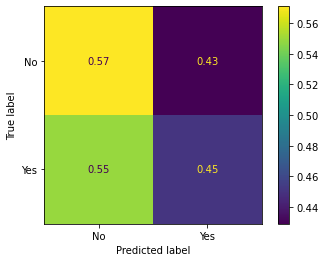

In [29]:
print('Model Test Confusion Matrix')
cm = confusion_matrix(val['isFraud'].astype(int),val['y_pred'],normalize='true') 
cmd = ConfusionMatrixDisplay(cm,display_labels=['No','Yes'])
cmd.plot()
print('Classification report : \n',classification_report(val['isFraud'].astype(int), val['y_pred']))

In [30]:
val.sample(3)

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,DeviceType,max_c,max_d,multi_transaction_per_time,browser_enc,device_info_v4,y_pred,score
99977,0,5.017280,1.0,2451.0,173.0,30.0,4.0,65.0,2.0,101.0,33.0,15.0,15.0,2.0,1.098612,0.040821,0.0,1.0,16.0,1,-0.568114
141795,0,3.888365,0.0,1976.0,365.0,27.0,2.0,16.0,1.0,131.0,36.0,52.0,53.0,2.0,1.098612,2.197225,0.0,7.0,13.0,0,-0.603208
30941,0,4.615121,2.0,184.0,333.0,30.0,2.0,63.0,1.0,91.0,33.0,1.0,1.0,0.0,0.693147,4.745294,0.0,2.0,17.0,1,-0.585524


In [31]:
val.groupby('isFraud')['y_pred'].value_counts(normalize=True)

isFraud  y_pred
0        0         0.570835
         1         0.429165
1        0         0.549126
         1         0.450874
Name: y_pred, dtype: float64

# 2.0 Training baseline

In [1]:
for i in df:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype(str)

NameError: name 'df' is not defined

In [ ]:
X_train = df.drop(columns='isFraud')
y_train = df['isFraud'].astype(float)

In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [ ]:
# parameters = {'model__max_depth':[3,6,10],
#               'model__n_estimators':[100,400,800],
#               'model__learning_rate':[0.05,0.01,0.1],
#               'model__min_samples_leaf':[1,3],
#               'model__min_samples_split':[2,4,6]}

In [ ]:
# {'model__learning_rate': 0.5, 'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__n_estimators': 600}

In [ ]:
parameters = {'model__max_depth':[6,8],'model__n_estimators':[500,800],'model__learning_rate':[0.05,0.1],'model__min_samples_leaf':[3,5]}

In [ ]:
model = mlu.model_training(X_train,y_train,numerical_cols,categorical_cols,parameters)

# 3.0 Evaluation baseline

In [ ]:
for i in val:
    if val[i].dtypes == 'object':
        val[i] = val[i].astype(str)

In [ ]:
X_val = val.drop(columns='isFraud')
y_val = val['isFraud'].astype(float)

In [ ]:
m = mlu.model_calibration(model,X_val,y_val)

In [ ]:
mlu.model_evaluation(m.base_estimator, X_val, y_val)

# 4.0 Error analysis

In [ ]:
val.insert(0,'probability_score','')
val['probability_score'] = model.predict_proba(X_val)[:,1]

In [ ]:
val.sample(2)

In [ ]:
er = val[(val['probability_score']<0.5) & (val['isFraud']=='1')]

In [ ]:
er.shape

In [ ]:
er.sample(5)

In [ ]:
er['probability_score'].hist()

In [ ]:
for i in er:
    print(i)
    print(er[i].value_counts(normalize=True).head(5))

# 4.0 Model Output

In [ ]:
with open('../../data_lake/output/trained_model_v1.pkl','wb') as file:
    pickle.dump(m.base_estimator, file)